<a href="https://colab.research.google.com/github/localtic/bigdata/blob/main/Bigdata_S5_Scipy%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0.데이터 다운로드

In [21]:
!git clone https://github.com/Soyoung-Yoon/data_02

Cloning into 'data_02'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 72 (delta 7), reused 0 (delta 0), pack-reused 47
Unpacking objects: 100% (72/72), 448.80 KiB | 1.92 MiB/s, done.


In [ ]:
import scipy
scipy.__version__

'1.10.0'

In [ ]:
# 버전 변경, 런타임 다시 시작 필요
!pip install scipy==1.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 61.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


### 확률분포 그리기

### 1.이산형 확률분포
- Probability Mass Function, PMF, 𝐲=𝒇(𝒙)
- 이산 확률 변수에서 특정 값에 대한 확률을 계산하기 위한 함수

#### 1-1.기하 분포(Geometric Distribution)

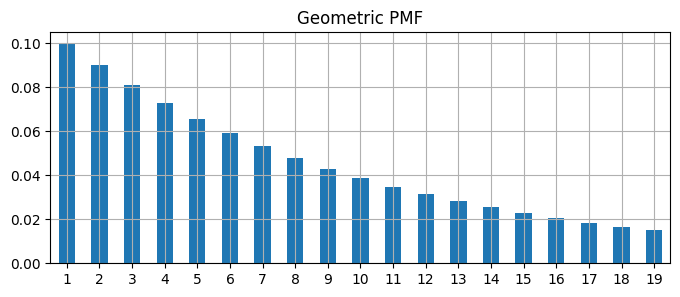

In [ ]:
# 확률이 0.1인 기하분포
from scipy.stats import geom
import matplotlib.pyplot as plt # 시각화는 시험과 무관
import pandas as pd

sp = 0.1 # 첫 번째 시도의 확률값
x = range(1, 20) # 시도 횟수
y = geom(p=sp).pmf(x)

# 시각화는 시험과 무관
s = pd.Series(y, index=x)
s.plot(kind='bar', figsize=(8, 3), rot=0, grid=True, title='Geometric PMF')
plt.show()

#### 1-2.초기하 분포(Hypergeometric Distribution)
- 비복원추출로 매번 실험 조건이 달라지는 경우 사용하는 확률분포
- 초기하 확률변수 X는 전체 모집단(M)에서 N개의 샘플을 비복원추출할 때 N개 샘플 중에서 첫 번째 그룹에 해당하는 샘플 수

In [ ]:
# M : 모집단 개수, n : 성공요소의 수(첫 번째 그룹 구성원), N : 시행횟수(선택 횟수)
# M, n, N = 100, 30, 20

# rv = hypergeom(M=100, n=30, N=20)
# rv.cdf(3) 3개 이하
# rv.pmf(3) 3개
# 1 - rv.cdf(2) 3개 이상

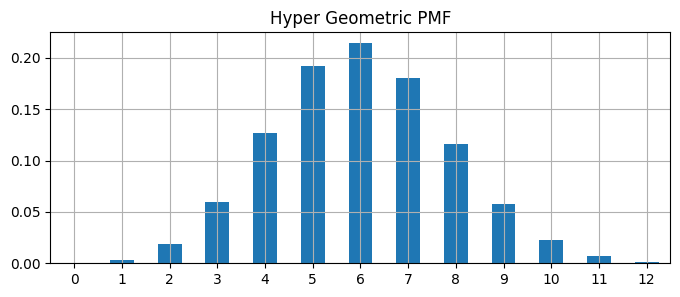

In [13]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import pandas as pd

# a, b, c를 찾는 것이 중요
a, b, c = 100, 30, 20
x = range(13) # 0 ~ 12
y = hypergeom(M=a, n=b, N=c).pmf(x)

s = pd.Series(y, index=x)
s.plot(kind='bar', figsize=(8, 3), grid=True, rot=0,
       title='Hyper Geometric PMF')
plt.show()

[0.0003 0.0036 0.0188 0.0597 0.1268 0.1918 0.2141 0.1803 0.1162 0.0578
 0.0222 0.0066 0.0015 0.0003 0.     0.     0.     0.     0.     0.
 0.     0.    ]


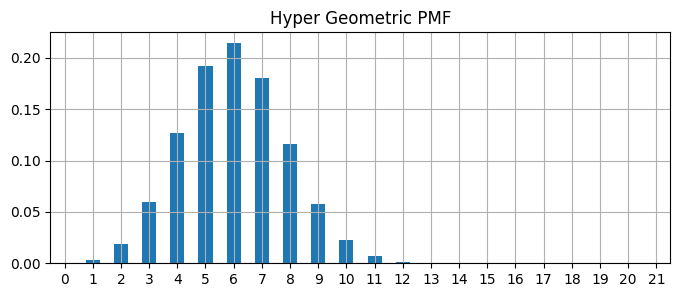

In [16]:
import numpy as np
a, b, c = 100, 30, 20
x = range(c+2)
y = hypergeom(M=a, n=b, N=c).pmf(x)

s = pd.Series(y, index=x)
print(s.to_numpy().round(4)) # 얼마나 작은 값인지 확인 가능
s.plot(kind='bar', figsize=(8, 3), grid=True, rot=0,
       title='Hyper Geometric PMF')
plt.show()

#### 1-3.포아송 분포(Poisson Distribution)
- 단위 시간이나 단위 공간에서 어떤 사건이 몇 번 발생할 것인지를 표현하는 분포
- 사건의 평균(mu)과 발생횟수(x)가 필요(단위 주의)

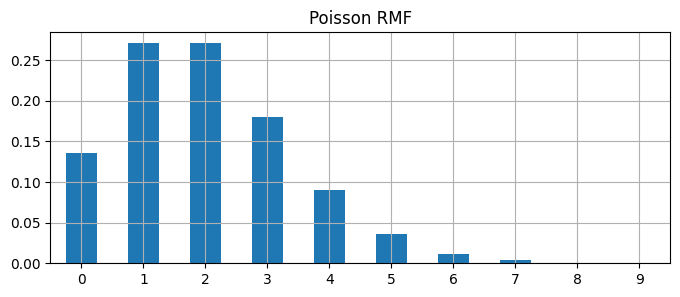

In [31]:
# mu = 단위/공간당 평균 발생 횟수
# 평균 2회 발생 횟수를 갖는 포아송 분포

from scipy.stats import poisson
import pandas as pd
import matplotlib.pyplot as plt

mu = 2
x = range(5*mu)
y = poisson(mu=mu).pmf(x)

s = pd.Series(y, index=x)
s.plot(kind='bar', figsize=(8, 3), rot=0, grid=True, title='Poisson RMF')
plt.show()

### 2.연속형 확률분포 객체 생성

PDF(Probability Density Function) : 확률 밀도 함수
- 연속적인 변수에 의한 확률 분포 함수
- 항상 양의 값을 가져야 하며, 모든 범위의 PDF를 합한 값은 1임
- f(x) >= 0
- 분포내 특정 값에서의 확률은 0, P(X=a) = 0, 정의된 범위 내에서의 확률은 범위내의 pdf 영역 넓이(적분값)가 됨

#### 2-1. 정규분포(Normal Distribution)
- 가우스 분포라고도 함
- 평균과 표준편차에 의해 모양이 결정됨
- 표준정규분포(Z분포): 평균 0, 표준편차/분산 1

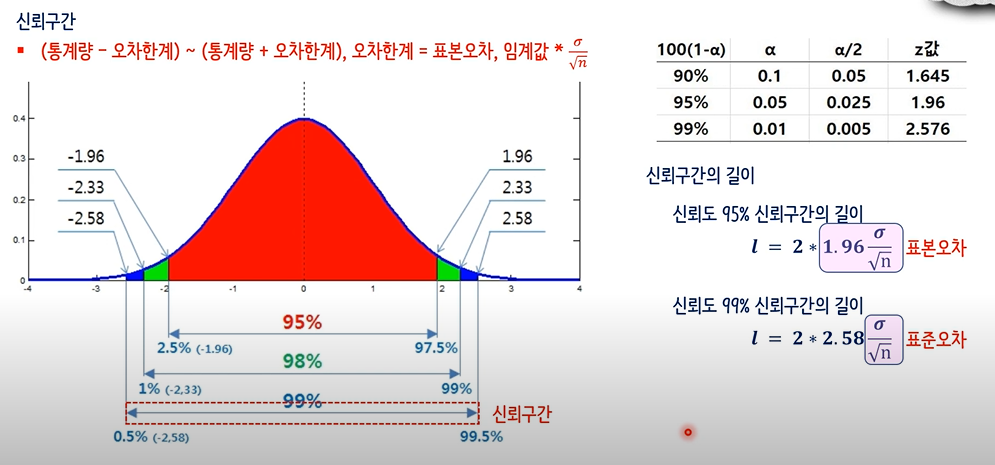

In [ ]:
# pdf, cdf x -> 확률
# ppf 확률 -> x (표본오차, 신뢰도 구할 때 사용)

In [ ]:
# 표준정규분포 객체 생성 및 그래프 그리기
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rv = norm(loc=0, scale=1)
x = np.arange(-3, 3, 0.1)
y1 = rv.pdf(x)
# y2 = norm.pdf(x, loc=0, scacle=1)
normal = pd.Series(y1, index=x)
normal.plot(title='Normal PDF', figsize=(5, 3), grid=True, style='b-')
plt.show()

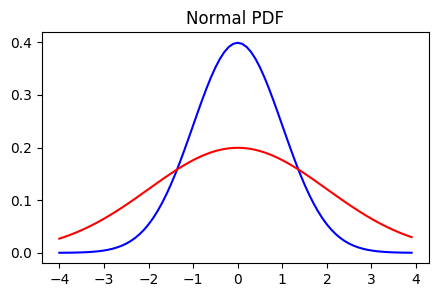

In [5]:
# 표준정규분포 객체 생성 및 그래프 그리기 - loc(평균), scale(표준편차) 대응
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mloc, mscale = 0, 1

rv = norm(loc=mloc, scale=mscale)
x = np.arange(mloc-4*mscale, mloc+4*mscale, 0.1) # 4표준편차 범위로 지정
y1 = rv.pdf(x)
y2 = norm.pdf(x, loc=mloc, scale=mscale)
y3 = norm.pdf(x, loc=mloc, scale=mscale*2)
normal2 = pd.Series(y2, index=x)
normal2.plot(title='Normal PDF', figsize=(5, 3), grid=True, style='b-')
normal3 = pd.Series(y3, index=x)
normal3.plot(style='r-')
plt.show()

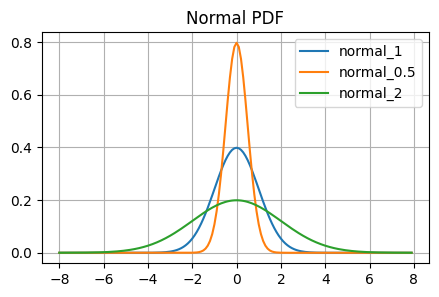

In [10]:
# DataFrame으로 그리기
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mloc, mscale = 0, 1

rv = norm(loc=mloc, scale=mscale)
x = np.arange(mloc-8*mscale, mloc+8*mscale, 0.1) # 4표준편차 범위로 지정
y1 = rv.pdf(x)
y2 = norm.pdf(x, loc=mloc, scale=mscale*0.5)
y3 = norm.pdf(x, loc=mloc, scale=mscale*2)

df = pd.DataFrame()
df[f'normal_{mscale}'] = pd.Series(y1, index=x)
df[f'normal_{mscale*0.5}'] = pd.Series(y2, index=x)
df[f'normal_{mscale*2}'] = pd.Series(y3, index=x)
df.plot(title='Normal PDF', figsize=(5, 3), grid=True)
plt.show()

#### 2-2. Student t분포
- 표본의 수가 30개 미만일 때 '신뢰구간', '가설검정'에 사용
- 표본의 수가 많아질수록 정규분포와 비슷

In [ ]:
# 모분산을 모르고 데이터가 30개 미만인 경우 t분포 사용
# df 자유도 loc 평균 scale 표준편차 confidence 신뢰도

In [ ]:
from scipy.stats import t
help(t)

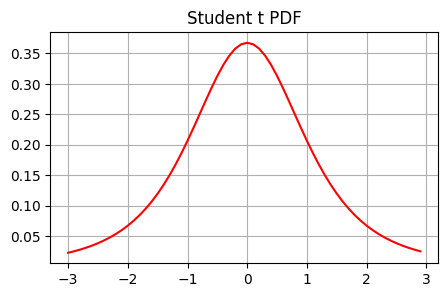

In [18]:
# Student t 분포 객체 생성 및 그래프 그리기
from scipy.stats import t
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dof = 3
rv = t(df=dof) # 기본값 loc=0 scale=1
x = np.arange(-3, 3, 0.1)
y = rv.pdf(x)
# print(x[:3], x[-3:])
student_t3 = pd.Series(y, index=x)
student_t3.plot(title='Student t PDF', figsize=(5, 3), grid=True, style='r-')
plt.show()

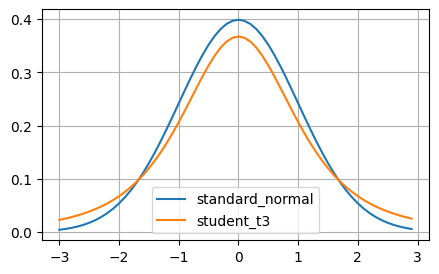

In [19]:
# 표준정규분포와 스튜던트 t 분표 비교
from scipy.stats import norm, t
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dof = 3 # t분포는 자유도가 커질수록 정규분포와 유사
rv_normal = norm()
rv_t3 = t(df=dof)
x = np.arange(-3, 3, 0.1)
pdList = pd.DataFrame()
pdList['standard_normal'] = rv_normal.pdf(x)
pdList['student_t3'] = rv_t3.pdf(x)
pdList.index = x
pdList.plot(figsize=(5, 3), grid=True)
plt.show()

#### 2-3.지수분포
- 사건 사이의 대기 시간에 대한 분포
- lambda(사건의 평균 발생 횟수)가 커질수록 사건 사이 평균 소요시간이 짧아짐
- scale: 평균대기시간

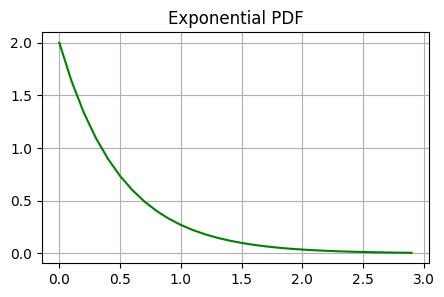

In [43]:
# Exponential(지수)분포 객체 생성 및 그래프 그리기
from scipy.stats import expon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

e_lambda = 2 # 푸아송의 lambda (단위시간/단위공간에서 발생하는 사건의 평균 횟수)
rv = expon(scale=1/e_lambda)
x = np.arange(0, 3, 0.1)
y = rv.pdf(x)
expon_s2 = pd.Series(y, index=x)
expon_s2.plot(title='Exponential PDF', figsize=(5, 3), grid=True, style='g-')
plt.show()

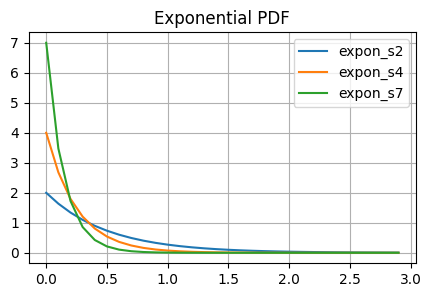

In [46]:
# Exponential(지수)분포 객체 생성 및 그래프 그리기
# 발생횟수 lambda 클수록 대기시간 짧아짐
from scipy.stats import expon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

e_lambda = 2
rv = expon(scale=1/e_lambda)
x = np.arange(0, 3, 0.1)

exp_df = pd.DataFrame()
exp_df['expon_s2'] = rv.pdf(x)
exp_df['expon_s4'] = expon.pdf(x, scale=1/4)
exp_df['expon_s7'] = expon.pdf(x, scale=1/7)
exp_df.index = x
exp_df.plot(title='Exponential PDF', figsize=(5, 3), grid=True)
plt.show()

#### 2-4.감마분포

In [ ]:
# Gamma(감마)분포 객체 생성 및 그래프 그리기


### 3.이산형 확률분포 문제

CDF(Cumulative Distribution Function) : 누적 분포 함수
- 어떤 확률 분포에 대해 확률 변수가 특정 값보다 작거나 같은 확률
- f(x) = P(X <= x)
- CDF를 미분하면 PDF, PDF를 적분하면 CDF가 됨

### 3-1.기하분포 활용문제


#### 3-1a.이하일 확률
- geom(p).cdf(x)
- A씨가 계란후라이를 만들 때 노른자를 깨지 않을 확률이 0.2라고 한다. A씨가 적어도 5번 이내에 노른자를 깨지 않을 확률을 구하시오.

In [ ]:
from scipy.stats import geom
# pmf(1) + pmf(2) + ... + pmf(5)
result = round(geom(p=0.2).cdf(5), 4)
print(result)

0.6723


In [ ]:
rv = geom(p=0.2)
result = rv.pmf(1) + rv.pmf(2) + rv.pmf(3) + rv.pmf(4) + rv.pmf(5)
result = round(result, 4)
print(result)

0.6723


In [ ]:
rv = geom(p=0.2)
x = range(1, 6)
result = round(rv.pmf(x).sum(), 4)
print(result)

0.6723


#### 3-1b.이상일 확률
- 1 - geom(p).cdf(x)
- 빅데이터분석기사 실기 합격률은 35%라고 한다. 이 시험에 2번 이상 응시해야 자격증 취득에 성공할 확률을 구하시오.

In [ ]:
from scipy.stats import geom
# 5번 이상인 경우 result = round(1 - geom(p=0.35).cdf(4), 2)
result = round(1 - geom(p=0.35).cdf(1), 2)
print(result)

0.65


#### 3-1c. 특정 횟수일 확률
- geom(p).cdf(x) - geom(p).cdf(x-1)
- A 야구선수의 홈런 칠 확률이 5%일 때, 이 선수가 4번째 타석에서 홈런 칠 확률을 구하시오.

In [ ]:
# 특정 횟수는 cdf, pmf 모두 가능
from scipy.stats import geom

c = 0.05
result = round(geom(p=c).pmf(4), 4)
print(result)

0.0429


In [ ]:
from scipy.stats import geom

c = 0.05
rv = geom(p=c)
result = round(rv.cdf(4) - rv.cdf(3), 4)
print(result)

0.0429


###3-2.초기하분포 활용문제

In [30]:
# 파란공, 빨간공 각 8개씩, 5개의 공을 비복원으로 뽑고
# 뽑은 공 중에서 3개 파란공 2개 빨간공일 확률

# rv.pmf(3) = rv.pmf(2)

from scipy.stats import hypergeom
a, b, c = 16, 8, 5
result = round(hypergeom(a, b, c).pmf(3), 5)
print(result)

0.35897


#### 3-2a.이하일 확률
- hypergeom(M, n, N).cdf(x)
- 어느 회사에서 랜덤박스 선물셋트를 50개 준비했다. 선물셋트에 향수가 포함된 것이 8개 라고 한다. 비복원추출로 선물셋트 4개를 뽑았을 때, 향수가 포함된 선물이 2개 이하로 나올 확률을 구하시오.

In [18]:
from scipy.stats import hypergeom
# a 전체 b 원하는 것 c 비복원추출하는 것
a, b, c = 50, 8, 4
result = round(hypergeom(M=a, n=b, N=c).cdf(2), 4) # cdf(2) 2개 이하
print(result)

0.9895


In [24]:
from scipy.stats import hypergeom
a, b, c = 50, 8, 4
rv = hypergeom(M=a, n=b, N=c)
result = round(rv.pmf(0) + rv.pmf(1) + rv.pmf(2), 4)
print(result)

0.9895


In [27]:
from scipy.stats import hypergeom
a, b, c = 50, 8, 4
rv = hypergeom(M=a, n=b, N=c)
x = range(3)
result = round(rv.pmf(x).sum(), 4)
print(result)

0.9895


#### 3-2b.이상일 확률
- 1 - hypergeom(M, n, N).cdf(x)
- 짱구엄마가 사과 20개와 배 8를 사왔다. 비복원추출로 사과와 배 5개를 집었을 때 배가 2개 이상일 확률을 구하시오.

In [20]:
from scipy.stats import hypergeom
a, b, c = 28, 8, 5
result = round(1 - hypergeom(a, b, c).cdf(1), 4) # M=a, n=b, N=c가 더 정확
print(result)

0.4479


#### 3-3c.특정 횟수일 확률
- hypergeom(M, n, N).pmf(x)
- hypergeom(M, n, N).cdf(x) - hypergeom(M, n, N).cdf(x-1)
- 뽑기 기계에 꽝이 아닌 것이 10개, 꽝이 30개 포함되어 있다고 한다. 비복원추출로 4개를 뽑았을 때 이중 꽝이 아닌 것이 3개 나올 확률을 구하시오.

In [22]:
from scipy.stats import hypergeom
a, b, c = 40, 10, 4
result = round(hypergeom(M=a, n=b, N=c).pmf(3), 4)
print(result)

0.0394


In [23]:
from scipy.stats import hypergeom
a, b, c = 40, 10, 4
rv = hypergeom(M=a, n=b, N=c)
result = round(rv.cdf(3) - rv.cdf(2), 4)
print(result)

0.0394


### 3-3.포아송분포 활용문제

In [ ]:
help(poisson)

#### 3-3a.이하일 확률
- poisson(mu).cdf(x)
- 어느 AS센터에 1시간당 평균 180건의 전화가 온다. 이때 1분 동안 걸려오는 전화 요청이 4건 이하일 확률을 구하시오.

In [33]:
from scipy.stats import poisson
mu = 180/60
result = poisson(mu=mu).cdf(4)
print(round(result, 4))

0.8153


####3-3b.이상일 확률
- 1- poisson(mu).cdf(x)
- 어느 가게에 1시간당 평균 8명의 손님이 온다. 이때, 1시간 동안 손님이 6명 이상 올 확률을 구하시오.

In [34]:
from scipy.stats import poisson
mu = 8
result = 1 - poisson(mu=mu).cdf(5)
print(round(result, 4))

0.8088


#### 3-3c.특정 개수일 확률
- poisson(mu).cdf(x) - poisson(mu).cdf(x-1)
- 출판사에서 원고 검수를 6 페이지 하였는데 오타가 총 12개 발견되었다고 한다. 이 원고에서 어떤 한 페이지를 검수하였을 때, 오타가 2개 나올 확률을 구하시오.


In [35]:
from scipy.stats import poisson
mu = 12 / 6
result = poisson(mu=mu).pmf(2)
print(round(result, 4))

0.2707


In [ ]:
from scipy.stats import poisson
mu = 12 / 6
result = poisson(mu=mu).cdf(2) - poisson(mu=mu).cdf(1)
print(round(result, 4))

### 4.연속형 확률분포 문제

### 4-1.정규분포 활용문제
- loc : 평균, scale : 표준편차
- x (확률변수) : 평균


#### 4-1a.이하일 확률
- norm(loc=평균, scale=표준편차).cdf(x) 사용
- Z회사의 USB 수명을 조사하였더니 USB의 평균 수명은 5000시간이고, 표준편차가 100시간인 정규분포를 따른다고 한다. USB의 수명이 4800시간 이하일 확률을 구하시오



In [11]:
from scipy.stats import norm
mu = 5000
std = 100

result = norm(loc=mu, scale=std).cdf(4800)
print(round(result, 4))

0.0228


#### 4-1b.이상일 확률
- 1 - norm(loc=평균, scale=표준편차).cdf(x) 사용
- A씨는 냉장고의 수명을 조사하였다. 냉장고의 평균 수명은 10년이고, 표준편차가 2년인 정규분포를 따른다고 한다.  냉장고의 수명이 14년 이상일 확률을 구하시오.


In [12]:
from scipy.stats import norm
mu = 10
std = 2
result = 1 - norm(loc=mu, scale=std).cdf(14)
print(round(result, 4))

0.0228


#### 4-1c.특정 구간일 확률
- norm(loc=평균, scale=표준편차).cdf(큰값) - norm(loc=평균, scale=표준편차).cdf(작은값)
- X회사에서 생산되는 계란은 평균 무게가 80g 이고 분산이 100g인 정규분포를 따른다고 한다. 계란의 평균 무게가 55g ~ 90g일 확률을 구하시오.


In [13]:
from scipy.stats import norm
mu = 80
std = 100 ** 0.5 # 분산에 루트
rv = norm(loc=mu, scale=std)
result = rv.cdf(90) - rv.cdf(55)
print(round(result, 4))

0.8351


#### 4-1d.정규분포 신뢰구간
- (통계량 – 오차한계) ~ (통계량 + 오차한계)
- 오차한계 = 표본오차, 임계값 * 𝜎/√𝑛
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
- norm.interval(confidence, loc=mu, scale=stderr)
- norm.ppf((1+confidence)/2, loc=mu, scale=stderr)
- scipy.stats.sem(data)로 stderr 구하기 가능


어느 배 농장에서 수확한 배의 평균 무게(𝝁)에 대해 알아보기 위해 36개의 배를 추출하여 무게를측정하였더니 평균이 602g, 표준편차가 30g이 나왔다고 한다. 이때 배의 평균 무게 (𝝁) 의 95% 신뢰구간을 구하여라


In [16]:
from scipy.stats import norm
n = 36
mu = 602
std = 30
confidence = 0.95
stderr = std/n**0.5
a, b = norm.interval(confidence, loc=mu, scale=stderr) # 결과 튜플로 나옴
print(round(a, 4), round(b, 4))

592.2002 611.7998


In [17]:
# ppf 사용
from scipy.stats import norm
n = 36
mu = 602
std = 30
confidence = 0.95
stderr = std/n**0.5
alpha = (1 - confidence) / 2
a, b = norm.ppf([alpha, confidence+alpha], loc=mu, scale=stderr)
print(round(a, 4), round(b, 4))

592.2002 611.7998


In [ ]:
confidence = 0.95
alpha1 = (1 - confidence) / 2 # 0.025 alpha
alpha2 = (1 + confidence) / 2 # 0.975 confidence+alpha
print(alpha1, alpha2)

### 4-2.t분포 활용문제

#### 4-2a.이하일 확률
상수원 수질을 나타내는 수치 중 하나로 ‘단위부피당 평균 세균수’가 있으며, A 호수의 10곳의 수질을 조사한 단위 부피당 세균수가 a.csv 파일에 기록되어 있다. 이 자료로부터 호수의 단위부피당 평균 세균수(𝝁)가 200 이하일 확률을 구하라.


In [29]:
import pandas as pd
from scipy.stats import t

# data_02/a.csv
s = pd.read_csv('data_02/a.csv')['water_quality']
mu, std = s.agg(['mean', 'std'])
rv = t(df=len(s)-1, loc=mu, scale=std)

print(round(rv.cdf(200), 4)) # 200 이하일 확률
print(round(1-rv.cdf(200), 4)) # 200 이상일 확률
print(round(rv.cdf(220)-rv.cdf(190), 4)) # 190~220 구간일 확률

0.6493
0.3507
0.5947


#### 4-2b.t분포 신뢰구간
모평균이 𝝁, 표준편차가 𝝈=8 인 정규분포를 따르는 모집단이 있다.  이 모집단에서 크기가 25인 표본을 추출하여 구한 평균이 42.7이었다. 이때, 모평균 𝝁 이 위치할 95% 신뢰도의
신뢰구간을 구하라.

In [31]:
from scipy.stats import t
# interval
n = 25
mu = 42.7
std = 8
confidence = 0.95
stderr = std / (n**0.5)
A, B = t(df=n-1).interval(confidence, loc=mu, scale=stderr)
print(f'{A:.4f} ~ {B:.4f}')

(39.39776230139517, 46.00223769860484)

In [33]:
from scipy.stats import t
# ppf
n = 25
mu = 42.7
std = 8
confidence = 0.95
stderr = std / (n**0.5)
alpha = (1 - confidence) / 2
A, B = t.ppf([alpha, confidence+alpha], df=n-1, loc=mu, scale=stderr)
print(f'{A:.4f} ~ {B:.4f}')

39.3978 ~ 46.0022


#### 4-2c.t분포 신뢰구간
우주선 제작에 사용되는 합금의 평균 장력 𝝁 를 추정하고자 한다. 15개의 새 합금조각으로부터 장력을 측정한 결과
평균이 39.3, 표준편차가 2.6으로 나타났다. 합금의 평균 장력 𝝁에 대한 90% 신뢰구간을 구하라.


In [35]:
from scipy.stats import t
# interval
n = 15
mu = 39.3
std = 2.6
confidence = 0.9
stderr = std / n**0.5
# A, B = t(df=n-1).interval(confidence, loc=mu, scale=stderr)
A, B = t.interval(confidence, df=n-1, loc=mu, scale=stderr)
print(f'{A:.4f} ~ {B:.4f}')

38.1176 ~ 40.4824


In [36]:
from scipy.stats import t
# ppf
n = 15
mu = 39.3
std = 2.6
confidence = 0.9
stderr = std / n**0.5
alpha = (1-confidence) / 2
A, B = t.ppf([alpha, confidence+alpha], df=n-1, loc=mu, scale=stderr)
print(f'{A:.4f} ~ {B:.4f}')

38.1176 ~ 40.4824


#### 4-2d.20대 수면시간 - t분포 사용
- interval(confidence, df, loc=0, scale=1)
- 20대 수면 평균 시간(𝝁)에 대해 추정하고자 한다.  sleepage.csv에 'stime20s' column을 사용하여, 20대 수면 평균 시간에 대해 99% 신뢰구간을 구하라.

In [38]:
import pandas as pd
from scipy.stats import t, sem
# stderr 구하는 함수 sem
sleep = pd.read_csv('data_02/sleepage.csv')['stime20s']
n = len(sleep)
mu, std = sleep.agg(['mean', 'std'])
confidence = 0.99
stderr = sem(sleep)
A, B = t.interval(confidence, df=n-1, loc=mu, scale=stderr)
print(f'{A:.4f} ~ {B:.4f}')

5.2154 ~ 7.0846


ppf를 사용하는 방법

In [39]:
import pandas as pd
from scipy.stats import t, sem
sleep = pd.read_csv('data_02/sleepage.csv')['stime20s']
n = len(sleep)
mu, std = sleep.agg(['mean', 'std'])
confidence = 0.99
stderr = sem(sleep)
alpha = (1-confidence) / 2
A, B = t.ppf([alpha, confidence+alpha], df=n-1, loc=mu, scale=stderr)
print(f'{A:.4f} ~ {B:.4f}')

5.2154 ~ 7.0846


In [41]:
# 함수 만들어보기(필수 X)
import pandas as pd
from scipy.stats import t, sem
def get_t_interval(n, mu, std, confidence):
    stderr = sem(sleep)
    alpha = (1-confidence) / 2
    A, B = t.ppf([alpha, confidence+alpha], df=n-1, loc=mu, scale=stderr)
    return A, B

sleep = pd.read_csv('data_02/sleepage.csv')['stime20s']
n = len(sleep)
mu, std = sleep.agg(['mean', 'std'])
confidence = 0.99
A, B = get_t_interval(len(sleep), sleep.mean(), sleep.std(), confidence)
print(f'{A:.4f} ~ {B:.4f}')

5.2154 ~ 7.0846


In [42]:
import pandas as pd
from scipy.stats import t, sem
def get_t_interval2(sleep, confidence):
    n = len(sleep)
    mu, std = sleep.agg(['mean', 'std'])
    stderr = sem(sleep)
    alpha = (1-confidence) / 2
    A, B = t.ppf([alpha, confidence+alpha], df=n-1, loc=mu, scale=stderr)
    return A, B

sleep = pd.read_csv('data_02/sleepage.csv')['stime20s']
A, B = get_t_interval2(sleep, 0.99)
print(f'{A:.4f} ~ {B:.4f}')

5.2154 ~ 7.0846


### 4-3.지수분포 활용문제
- 단위 시간당 발생하는 평균 사건의 수 : λ
- 발생하는 사건들 사이의 시간 : x (확률변수)


#### 4-3a.이하일 확률
- expon(scale=1/λ).cdf(x) 사용
- 전자 제품의 5년간 고장횟수가 평균 1회이고, 지수분포를 따른다. 1년 안에 고장 날 확률을 구하시오.


In [47]:
from scipy.stats import expon
# 단위시간: 년
e_lambda = 1/5
result = expon(scale=1/e_lambda).cdf(1).round(4)
print(result)

0.1813


In [51]:
from scipy.stats import expon
# e_lambda 그대로 사용 가능
e_lambda = 5
result = expon(scale=e_lambda).cdf(1).round(4)
print(result)

0.1813


#### 4-3b.이상일 확률
- 1 - expon(scale=1/λ).cdf(x) 사용
- 어느 회사에서 생산하는 냉장고 평균수명은 10년이고, 지수분포를 따른다. 이 냉장고의 수명이 10년 이상 지속될 확률을 구하시오.

In [48]:
from scipy.stats import expon
e_lambda = 1/10
result = (1 - expon(scale=1/e_lambda).cdf(10)).round(4)
print(result)

0.3679


In [52]:
from scipy.stats import expon
e_lambda = 10
result = (1 - expon(scale=e_lambda).cdf(10)).round(4)
print(result)

0.3679


#### 4-3c.특정 구간일 확률
- expon(scale=1/λ).cdf(큰값) - expon(scale=1/λ).cdf(작은값)
- 어느 커피샵에서 커피를 구입하기 위해 대기하는 시간이 평균 7분이고, 지수분포를 따른다.
이 커피샵에 갔을 때 대기하는 시간이 4분에서 10분일 확률을 구하시오.

In [49]:
from scipy.stats import expon
# 단위시간: 분
e_lambda = 1/7
result = expon(scale=1/e_lambda).cdf(10) - expon(scale=1/e_lambda).cdf(4)
print(round(result, 4))

0.3251


In [50]:
from scipy.stats import expon
# 단위시간: 분
e_lambda = 1/7
rv = expon(scale=1/e_lambda)
result = (rv.cdf(10) - rv.cdf(4)).round(4)
print(result)

0.3251


In [53]:
from scipy.stats import expon
# 단위시간: 분
e_lambda = 7
rv = expon(scale=e_lambda)
result = (rv.cdf(10) - rv.cdf(4)).round(4)
print(result)

0.3251


### 4-4.감마분포 활용문제
- 확률변수 x = 𝜶 개의 사건이 발생할 때까지 걸리는 시간 (어떤 사건이 여러 번 발생하는 데 걸리는 시간)
- n: 사건발생건수, λ : 단위시간/공간 당 발생하는 사건 평균 건 수

#### 4-4a.이하일 확률
- gamma(a=n, scale=1/λ)
- A씨는 한 시간에 평균 6개의 택배를 배송한다. 30개의 택배를 배송할 때 걸리는 시간이 5시간 이하로 소요될 확률을 구하시오.

In [ ]:
from scipy.stats import gamma


#### 4-4b.이상일 확률
- 1 - gamma(a=n, scale=1/λ).cdf(x)
- B은행은 한 명의 고객응대에 평균 5분이 소요된다.  이 은행에서 30명의 고객응대에 2시간 이상으로 소요될 확률을 구하시오.

In [ ]:
from scipy.stats import gamma



#### 4-4c.특정 구간일 확률
- gamma(a=n, scale=1/λ).cdf(큰값) - gamma(a=n, 1/λ).cdf(작은값)
- C씨는 비즈 목걸이를 만드는데 평균 30분 걸린다.  5개 비즈 목걸이를 만들 때까지 걸리는 시간이 2시간에서 4시간 사이 소요될 확률을 구하시오

In [ ]:
from scipy.stats import gamma



In [ ]:
####  카이제곱, F분포 등을 추가해 보려고 합니다. (우선 모수, 비모수 검정을 녹화합니다)